## Import Library

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Import Data



In [97]:
train = pd.read_csv('Train_Titanic.csv')

In [98]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [99]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Exploratory Data Analysis



## Missing Data

Kita bisa menggunakan seaborn untuk melihat apakah ada data yang missing

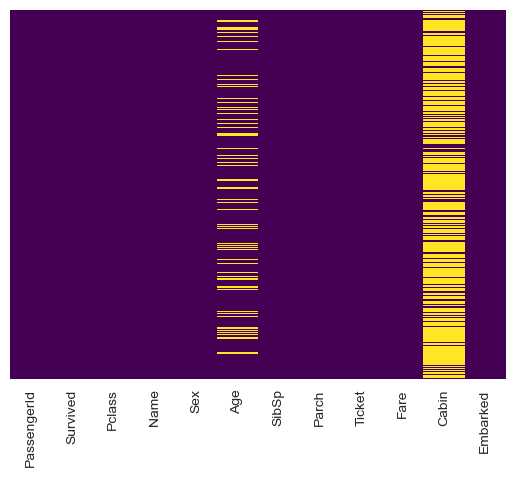

In [100]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis');

Sekitar 20% data Age memiliki missing value, dan sekitar 90%-an cabin memiliki missing value

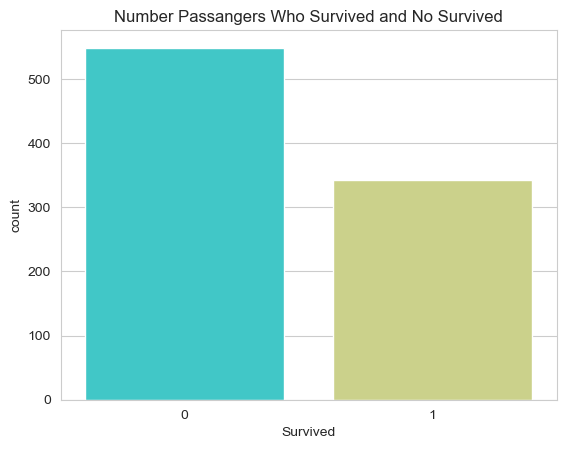

In [101]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='rainbow')
plt.title('Number Passangers Who Survived and No Survived');

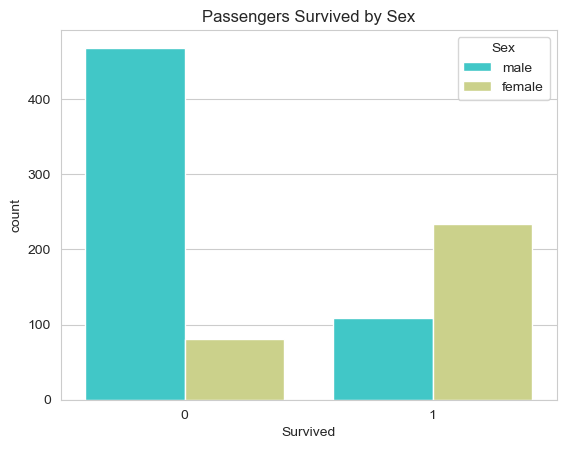

In [102]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='rainbow')
plt.title('Passengers Survived by Sex');

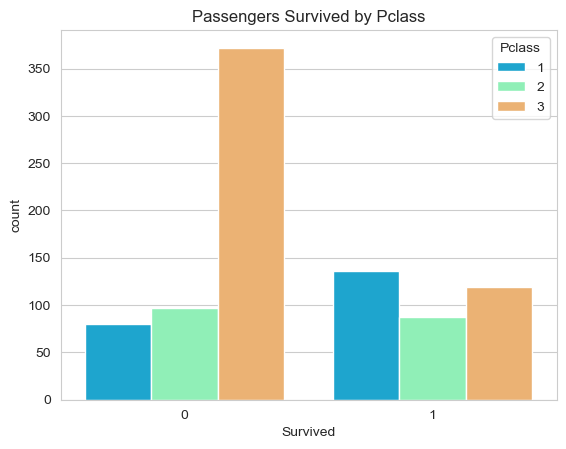

In [103]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')
plt.title('Passengers Survived by Pclass');

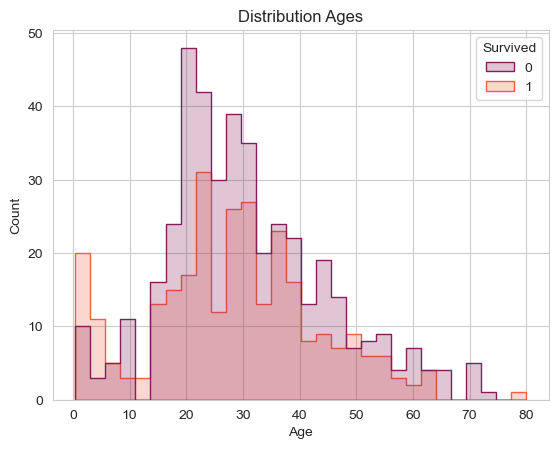

In [104]:
sns.histplot(data=train, x='Age', bins=30, element='step', hue='Survived', palette='rocket')
plt.title('Distribution Ages');

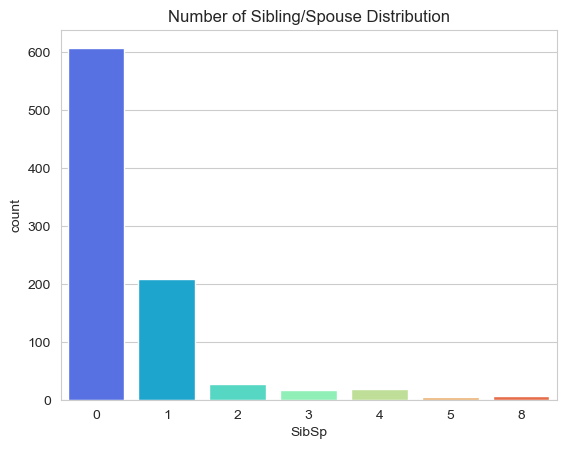

In [105]:
sns.countplot(x='SibSp',data=train, palette='rainbow')
plt.title('Number of Sibling/Spouse Distribution');

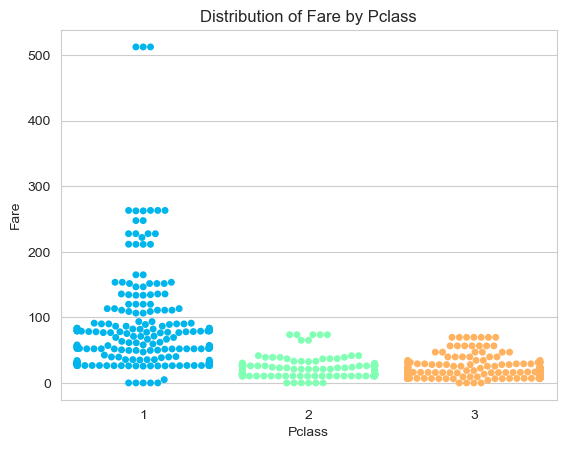

In [50]:
sns.swarmplot(data=train, x='Pclass', y='Fare', palette='rainbow')
plt.title('Distribution of Fare by Pclass');

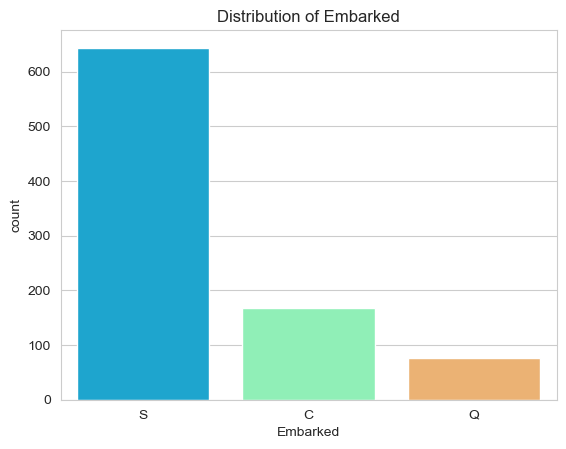

In [106]:
sns.countplot(data=train, x='Embarked', palette='rainbow')
plt.title('Distribution of Embarked');

___
# Data Preparation


## Treatment Missing Value

Mengisi nilai umur yang missing dengan median dari masing-masing Pclass

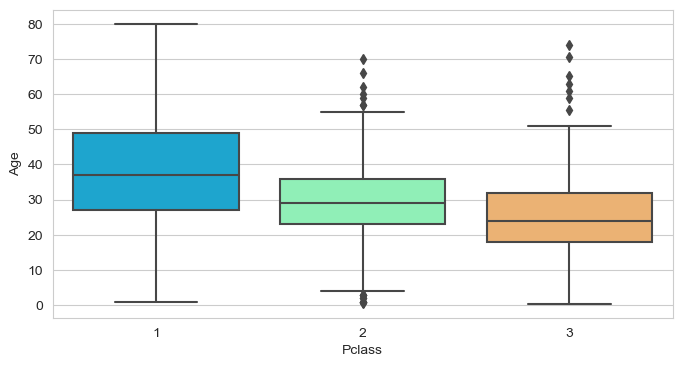

In [107]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Pclass',y='Age',data=train,palette='rainbow');

Dapat dilihat pada masing-masing Pclass memiliki median umur yang berbeda, sehingga kita bisa mengisi nilai missing value dengan nilai median pada masing-masing Pclass.

In [108]:
med_age1 = train[train['Pclass']==1]['Age'].median()
med_age2 = train[train['Pclass']==2]['Age'].median()
med_age3 = train[train['Pclass']==3]['Age'].median()

In [109]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return med_age1

        elif Pclass == 2:
            return med_age2

        else:
            return med_age3

    else:
        return Age

Sekarang aplikasikan fungsi di atas dengan data umur

In [110]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

Kita cek map lagi

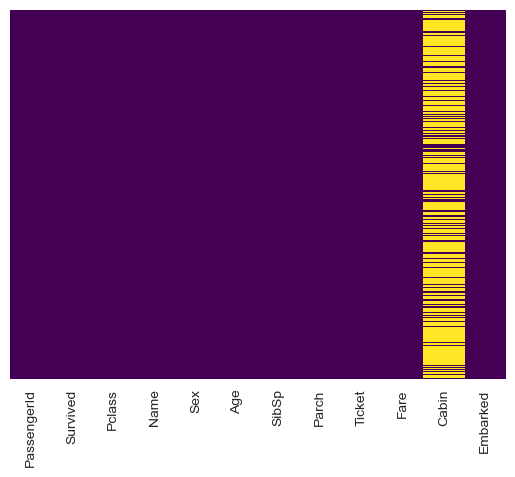

In [111]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis');

**Karena variable Cabin terlalu banyak data missing, maka kita bisa mendrop**

In [112]:
train.drop('Cabin',axis=1,inplace=True)

In [113]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


**Menghapus missing value yang tersisa**

In [114]:
train.dropna(inplace=True)

**Kita cek heatmap lagi untuk melihat missing value!**

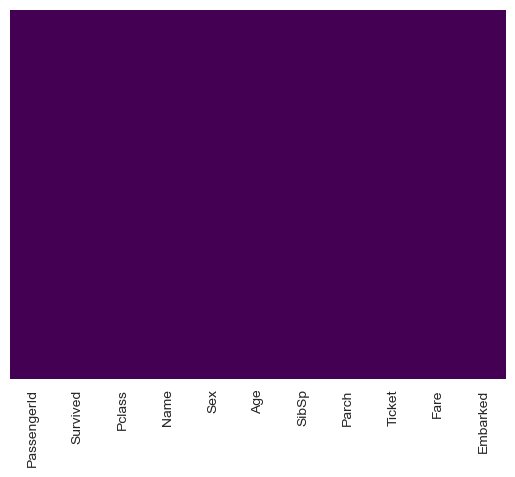

In [115]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis');

Dari heatmap dapat dilihat bahwa semua data missing value sudah terhapus

## Features Encoding

Kita perlu ubah data kategori menjadi data numerik dengan membuat data dummy

In [116]:
# membuat label encoding pada kolom Sex dan Embarked
sex = {"female" : 0, "male" : 1}
train['Sex'] = train['Sex'].map(sex)
embarked = {"C" : 0, "Q" : 1, "S":2}
train['Embarked'] = train['Embarked'].map(embarked)

In [117]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


**Kita dapat membuang variabel yang tidak diperlukan dalam pembuatan model**

In [118]:
train.drop(['Name','Ticket','PassengerId'],axis=1,inplace=True)

In [119]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


## Treatment outlier

**Mendeteksi outlier pada data Age dan Fare dengan Boxplot**

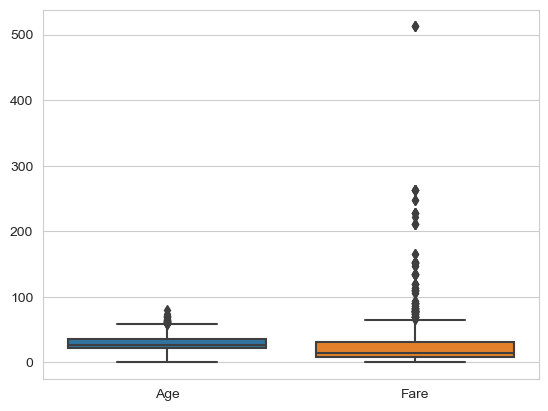

In [120]:
sns.boxplot(train[['Age','Fare']]);

Pada variable fare terlihat bahwa terdapat nilai outlier yang signifikan, sehingga perlu dihapus.

In [121]:
Q1 = train['Fare'].quantile(0.25)
Q3 = train['Fare'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

filtered_entries = ((train['Fare'] >= low_limit) & (train['Fare'] <= high_limit))

train['Fare'] = train['Fare'][filtered_entries]

In [122]:
train.dropna(inplace=True)

In [123]:
train.shape

(775, 8)

**Ukuran data setelah menghapus outlier tersisa 775 baris**

## Min-Max Scaler

In [124]:
from sklearn.preprocessing import MinMaxScaler

In [125]:
scaler = MinMaxScaler()

In [126]:
train_transform = scaler.fit_transform(train)

In [127]:
train_transform = pd.DataFrame(train_transform, columns=train.columns)

In [128]:
train_transform.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,1.0,1.0,0.271174,0.2,0.0,0.111538,1.0
1,1.0,1.0,0.0,0.321438,0.0,0.0,0.121923,1.0
2,1.0,0.0,0.0,0.434531,0.2,0.0,0.816923,1.0
3,0.0,1.0,1.0,0.434531,0.0,0.0,0.123846,1.0
4,0.0,1.0,1.0,0.296306,0.0,0.0,0.130128,0.5




# Building model


## Train Test Split

In [129]:
from sklearn.model_selection import train_test_split

In [131]:
X = train_transform.drop('Survived',axis=1)
y = train_transform['Survived']

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Logistic Regression

In [133]:
from sklearn.linear_model import LogisticRegression

In [134]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [135]:
predictions = logmodel.predict(X_test)

**Evaluasi model regresi logistik**

In [138]:
from sklearn.metrics import classification_report, confusion_matrix

In [139]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[132  19]
 [ 32  50]]
              precision    recall  f1-score   support

         0.0       0.80      0.87      0.84       151
         1.0       0.72      0.61      0.66        82

    accuracy                           0.78       233
   macro avg       0.76      0.74      0.75       233
weighted avg       0.78      0.78      0.78       233



## Random Forest

In [140]:
from sklearn.ensemble import RandomForestClassifier

In [141]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [142]:
y_predict = rf.predict(X_test)

**Evaluasi model random forest**

In [143]:
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[134  17]
 [ 31  51]]
              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85       151
         1.0       0.75      0.62      0.68        82

    accuracy                           0.79       233
   macro avg       0.78      0.75      0.76       233
weighted avg       0.79      0.79      0.79       233



## Decision Tree

In [145]:
from sklearn.tree import DecisionTreeClassifier

In [146]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_predict = dtc.predict(X_test)

**Evaluasi model decision tree**

In [147]:
print(confusion_matrix(y_test, dtc_predict))
print(classification_report(y_test, dtc_predict))

[[126  25]
 [ 27  55]]
              precision    recall  f1-score   support

         0.0       0.82      0.83      0.83       151
         1.0       0.69      0.67      0.68        82

    accuracy                           0.78       233
   macro avg       0.76      0.75      0.75       233
weighted avg       0.78      0.78      0.78       233



**Dari evaluasi ketiga model, didapatkan bahwa model random forest memiliki akurasi tertinggi yaitu 79%. Maka, model random forest dipilih untuk melakukan prediksi pada data testing**

# Testing Data

**Import data testing**

In [185]:
test = pd.read_csv('Test_Titanic.csv')

In [166]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Hapus kolom yang tidak diperlukan**

In [167]:
test.drop(['PassengerId','Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

**Mengubah data kategori menjadi numerik**

In [168]:
sex = {"female" : 0, "male" : 1}
test['Sex'] = test['Sex'].map(sex)
embarked = {"C" : 0, "Q" : 1, "S":2}
test['Embarked'] = test['Embarked'].map(embarked)

In [169]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


**Cek missing value**

In [170]:
test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

**Mengisi data fare yang missing dengan nilai median**

In [173]:
test['Fare']= test['Fare'].fillna(test['Fare'].median())

**Mengisi missing value pada data age dengan nilai median pada setiap pclass**

In [174]:
med_age1_test = test[test['Pclass']==1]['Age'].median()
med_age2_test = test[test['Pclass']==2]['Age'].median()
med_age3_test = test[test['Pclass']==3]['Age'].median()

In [175]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return med_age1_test

        elif Pclass == 2:
            return med_age2_test

        else:
            return med_age3_test

    else:
        return Age

In [176]:
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

**Menghapus missing value yang tersisa**

In [177]:
test.dropna(inplace=True)

In [178]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [179]:
test_transform = scaler.fit_transform(test)
test_transform = pd.DataFrame(test_transform, columns=test.columns)

In [180]:
test_transform.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,1.0,0.452723,0.000,0.000000,0.015282,0.5
1,1.0,0.0,0.617566,0.125,0.000000,0.013663,1.0
2,0.5,1.0,0.815377,0.000,0.000000,0.018909,0.5
3,1.0,1.0,0.353818,0.000,0.000000,0.016908,1.0
4,1.0,0.0,0.287881,0.125,0.111111,0.023984,1.0


**Melakukan prediksi data pada data testing dengan model random forest**

In [181]:
predict = pd.Series(rf.predict(test_transform))

In [186]:
test['predict'] = predict

In [187]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,predict
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1.0


In [189]:
survived = {0.0 : "Death", 1.0 : "Survived"}
test['predict'] = test['predict'].map(survived)

In [190]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,predict
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Death
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Death
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Death
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Survived
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Survived


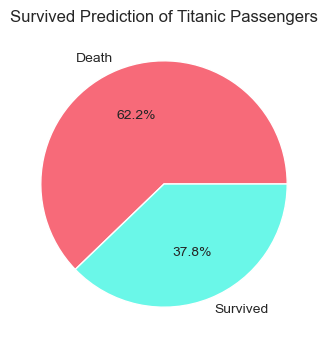

In [193]:
plt.figure(figsize=(4,4))
plt.pie(test['predict'].value_counts(), labels=test['predict'].unique(), autopct='%1.1f%%', colors=['#f76a79', '#6af7e8'])
plt.title('Survived Prediction of Titanic Passengers')
plt.show()